# Reuter News Category Mulci Classification

### EDA 및 데이터 전처리

In [43]:
# 필요한 라이브러리 임포트
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

3가지의 단어 개수를 이용하여 머신러닝을 진행한다.

5,000개, 10,000개, 그리고 제한이 없는 단어 개수로 진행한다.

각각의 변수명은 x_train_half, x_train, x_train_all로 한다.

In [67]:
(x_train_all, y_train_all), (x_test_all, y_test_all) = reuters.load_data()

In [68]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

In [69]:
(x_train_half, y_train_half), (x_test_half, y_test_half) = reuters.load_data(num_words=5000, test_split=0.2)

In [5]:
# test_split 파라미터를 지정해주지 않아도 0.2가 default로 지정되어 있음을 알 수 있다
len(x_test_all)

2246

In [6]:
len(x_test)

2246

In [7]:
print(x_train[0])
print(x_test[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [8]:
print(y_train[0])
print(y_test[0])

3
3


In [9]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


총 46개의 클래스 다중 분류 문제임을 확인할 수 있다.

훈련용 뉴스의 최대 길이 :9453
훈련용 뉴스의 평균 길이 :796.0681362725451


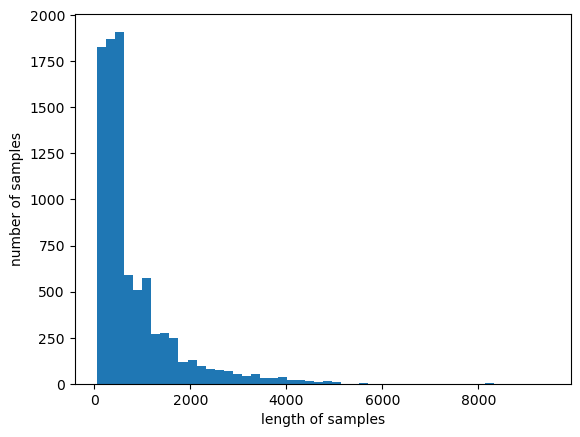

In [108]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

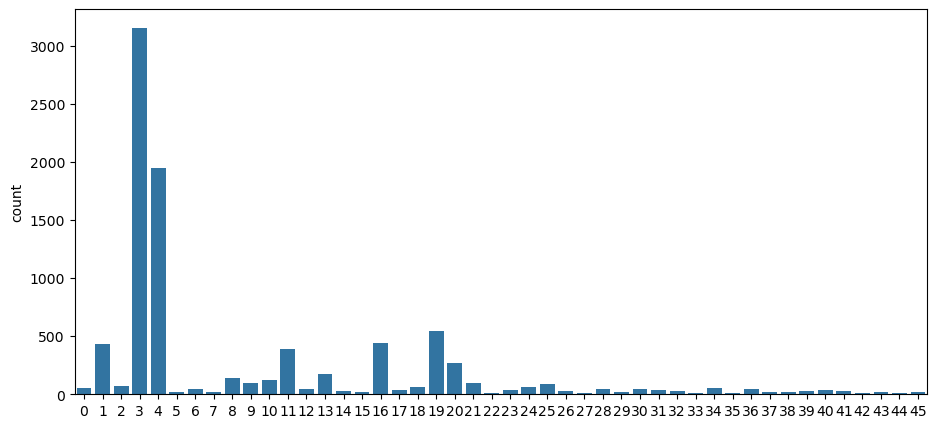

In [109]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

데이터의 길이에 대한 분포는 왼쪽으로 많이 쏠려 있고, 클래스 분포 또한 3, 4번에 몰려 있는 편이다. 분포를 보았을 때는 굉장히 불균형한 데이터셋으로 확인할 수 있겠다.



데이터가 숫자 벡터 형식으로 가져와졌으므로, dtm과 tfidf를 수행하기 위해 문자 형식으로 바꾼다.

In [10]:
word_index = reuters.get_word_index(path='reuters_word_index.json')

In [11]:
word_index['the']

1

In [12]:
index_word = {index+3 : word for word, index in word_index.items()}
print(index_word[4])

the


In [13]:
for index, token in enumerate(('<pad>', '<sos>', '<unk>')):
    index_word[index] = token

In [14]:
# 숫자 벡터를 문자 형식으로 바꾸는 함수 decode_str
def decode_str(data):
    decoded = []
    for i in range(len(data)):
        t = ' '.join([index_word[index] for index in data[i]])
        decoded.append(t)
    print(len(decoded))
    
    return decoded

In [15]:
decode_str(x_train)

8982


['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for o

In [70]:
# 모든 단어기준 데이터셋에 대해 decode_str을 적용한다
x_train = decode_str(x_train)
x_test = decode_str(x_test)
x_train_all = decode_str(x_train_all)
x_test_all = decode_str(x_test_all)
x_train_half = decode_str(x_train_half)
x_test_half = decode_str(x_test_half)

8982
2246
8982
2246
8982
2246


문자열화가 이루어진 데이터셋에 대해 벡터화를 수행한다.

dtm을 우선 적용하고, tfidf를 적용하되 train 데이터가 적용된 vectorizer가 test 데이터에도 동일하게 적용될 수 있도록 한다.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [71]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 9670)


In [72]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 9670)


In [73]:
x_test_dtm = dtmvector.transform(x_test)
tfidfv_test = tfidf_transformer.transform(x_test_dtm)

In [74]:
dtmvector = CountVectorizer()
x_train_all_dtm = dtmvector.fit_transform(x_train_all)
print(x_train_all_dtm.shape)

tfidf_transformer = TfidfTransformer()
tfidfv_all = tfidf_transformer.fit_transform(x_train_all_dtm)
print(tfidfv_all.shape)

(8982, 26506)
(8982, 26506)


In [75]:
x_test_all_dtm = dtmvector.transform(x_test_all)
tfidfv_all_test = tfidf_transformer.transform(x_test_all_dtm)

In [76]:
dtmvector = CountVectorizer()
x_train_half_dtm = dtmvector.fit_transform(x_train_half)
print(x_train_half_dtm.shape)

tfidf_transformer = TfidfTransformer()
tfidfv_half = tfidf_transformer.fit_transform(x_train_half_dtm)
print(tfidfv_half.shape)

(8982, 4867)
(8982, 4867)


In [77]:
x_test_half_dtm = dtmvector.transform(x_test_half)
tfidfv_half_test = tfidf_transformer.transform(x_test_half_dtm)

### ML 모델링

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

ml_metrics 함수는 정확도, f1, precision, recall을 확인하는 함수이다.

다중 분류 문제이므로 f1, precision, recall은 average='weighted' 파라미터를 적용한다.

위의 EDA 결과를 확인했을 때 데이터가 불균형한 모습을 보이기 때문이다.

In [38]:
def ml_metrics(testy, prediction, str):
    print(str + ' 정확도:', accuracy_score(testy, prediction))
    print(str + ' f1 score:', f1_score(testy, prediction, average='weighted'))
    print(str + ' precision score:', precision_score(testy, prediction, average='weighted'))
    print(str + ' recall score:', recall_score(testy, prediction, average='weighted'))

여기서는 8가지 머신러닝 모델을 사용한다.

나이브 베이즈 분류기, ComplementNB, 로지스틱 회귀, 서포트 벡터 머신, 결정 트리, 랜덤 포레스트, 그래디언트 부스팅 트리, 보팅이다.

보팅의 경우 로지스틱 회귀, CNB, 그래디언트 부스팅을 사용하고 soft 방식으로 투표를 진행한다.

해당 과정을 단어 개수별로 진행해야 하므로, 함수로 정의하여 좀 더 편하게 수행해보자.

In [50]:
def nlp_ml(trainx, trainy, testx, testy):
    # 나이브 베이즈 분류기
    mnb = MultinomialNB()
    mnb.fit(trainx, trainy)
    mnb_predicted = mnb.predict(testx)
    ml_metrics(testy, mnb_predicted, '나이브 베이즈')
    print('')
    
    # CNB
    cb = ComplementNB()
    cb.fit(trainx, trainy)
    cb_predicted = cb.predict(testx)
    ml_metrics(testy, cb_predicted, 'CNB')
    print('')

    # 로지스틱 회귀
    lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
    lr.fit(trainx, trainy)
    lr_predicted = lr.predict(testx)
    ml_metrics(testy, lr_predicted, '로지스틱 회귀')
    print('')

    # 서포트 벡터 머신
    lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
    lsvc.fit(trainx, trainy)
    lsvc_predicted = lsvc.predict(testx)
    ml_metrics(testy, lsvc_predicted, '서포트 벡터 머신')
    print('')
    
    # 결정 트리
    tree = DecisionTreeClassifier(max_depth=10, random_state=0)
    tree.fit(trainx, trainy)
    tree_predicted = tree.predict(testx)
    ml_metrics(testy, tree_predicted, '결정 트리')
    print('')
    
    # 랜덤 포레스트
    forest = RandomForestClassifier(n_estimators=5, random_state=0)
    forest.fit(trainx, trainy)
    forest_predicted = forest.predict(testx)
    ml_metrics(testy, forest_predicted, '랜덤 포레스트')
    print('')
    
    # 그래디언트 부스팅 트리
    grbt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
    grbt.fit(trainx, trainy)
    grbt_predicted = grbt.predict(testx)
    ml_metrics(testy, grbt_predicted, '그래디언트 부스팅')
    print('')
    
    # 보팅
    voting =  VotingClassifier([('lr', LogisticRegression(C=10000, penalty='l2', max_iter=3000)), ('cnbc',ComplementNB()), ('gbc',GradientBoostingClassifier(random_state=0, learning_rate=0.01))], voting='soft')
    voting.fit(trainx, trainy)
    voting_predicted = voting.predict(testx)
    ml_metrics(testy, voting_predicted, '보팅')

In [51]:
# num_words=10000
nlp_ml(tfidfv, y_train, tfidfv_test, y_test)

나이브 베이즈 정확도: 0.6567230632235085
나이브 베이즈 f1 score: 0.5764467518778252
나이브 베이즈 precision score: 0.5924150721676643
나이브 베이즈 recall score: 0.6567230632235085

CNB 정확도: 0.7707034728406055
CNB f1 score: 0.7456682614453047
CNB precision score: 0.7545538951201723
CNB recall score: 0.7707034728406055

로지스틱 회귀 정확도: 0.811219946571683
로지스틱 회귀 f1 score: 0.8060597406804477
로지스틱 회귀 precision score: 0.812455379447422
로지스틱 회귀 recall score: 0.811219946571683

서포트 벡터 머신 정확도: 0.7827248441674087
서포트 벡터 머신 f1 score: 0.7793179448721839
서포트 벡터 머신 precision score: 0.7848782963151928
서포트 벡터 머신 recall score: 0.7827248441674087

결정 트리 정확도: 0.6202137132680321
결정 트리 f1 score: 0.5776398779280149
결정 트리 precision score: 0.6053383736872784
결정 트리 recall score: 0.6202137132680321

랜덤 포레스트 정확도: 0.674087266251113
랜덤 포레스트 f1 score: 0.6429484177284822
랜덤 포레스트 precision score: 0.6579138258137677
랜덤 포레스트 recall score: 0.674087266251113

그래디언트 부스팅 정확도: 0.757346393588602
그래디언트 부스팅 f1 score: 0.7438154301938211
그래디언트 부스팅 precision

10,000개의 단어를 사용했을 때의 결과는 위와 같다.

로지스틱 회귀의 결과가 가장 좋은 것을 확인할 수 있고, 결정 트리의 정확도가 가장 떨어짐을 확인할 수 있다.

이는 결정 트리의 과적합 등의 이유로 좋은 성능을 내지 못하는 것으로 보인다.

또한 랜덤 포레스트는 경험적으로 꽤나 좋은 성능을 보여주었던 기억이 있는데, 해당 데이터셋에서는 그리 좋은 성능을 발휘하지 못하는 것을 볼 수 있다.

그래디언트 부스팅은 랜덤 포레스트보다는 좋은 성능을 보여주는 것을 확인할 수 있다. 다만 learning_rate을 default로 설정했을 때는 loss값이 비정상적으로 커지는 결과를 보여 learning_rate을 조정해주었다.

로지스틱 회귀와 CNB, Gradient Boosting을 사용한 보팅 모델이 0.822로 가장 높은 성능을 보여준다. CNB보다 더 좋은 성능을 보인 서포트 벡터 머신을 포함하면 좀 더 높은 성능을 보여줄 것으로 예상되기도 한다.

그러면 단어를 전부 사용한 모델과 5000개만 사용한 모델에 대해서도 모델링과 평가를 수행해보자.

In [52]:
# num_words = None
nlp_ml(tfidfv_all, y_train, tfidfv_all_test, y_test)

나이브 베이즈 정확도: 0.5997328584149599
나이브 베이즈 f1 score: 0.5045670886188423
나이브 베이즈 precision score: 0.49856433577151776
나이브 베이즈 recall score: 0.5997328584149599

CNB 정확도: 0.7649154051647373
CNB f1 score: 0.7346534179503126
CNB precision score: 0.7459397703141223
CNB recall score: 0.7649154051647373

로지스틱 회귀 정확도: 0.8170080142475512
로지스틱 회귀 f1 score: 0.8118410258673071
로지스틱 회귀 precision score: 0.8185347844044119
로지스틱 회귀 recall score: 0.8170080142475512

서포트 벡터 머신 정확도: 0.788512911843277
서포트 벡터 머신 f1 score: 0.7835855945959898
서포트 벡터 머신 precision score: 0.7885748503495307
서포트 벡터 머신 recall score: 0.788512911843277

결정 트리 정확도: 0.6211041852181657
결정 트리 f1 score: 0.5769283128518846
결정 트리 precision score: 0.6168486374034606
결정 트리 recall score: 0.6211041852181657

랜덤 포레스트 정확도: 0.6544968833481746
랜덤 포레스트 f1 score: 0.6225909375608356
랜덤 포레스트 precision score: 0.6327306310878354
랜덤 포레스트 recall score: 0.6544968833481746

그래디언트 부스팅 정확도: 0.7617987533392698
그래디언트 부스팅 f1 score: 0.7479887236146305
그래디언트 부스팅 prec

In [53]:
# num_words = 5000
nlp_ml(tfidfv_half, y_train, tfidfv_half_test, y_test)

나이브 베이즈 정확도: 0.6731967943009796
나이브 베이즈 f1 score: 0.6012501291711391
나이브 베이즈 precision score: 0.6015128722018227
나이브 베이즈 recall score: 0.6731967943009796

CNB 정확도: 0.7707034728406055
CNB f1 score: 0.7458990404916549
CNB precision score: 0.7563052269065773
CNB recall score: 0.7707034728406055

로지스틱 회귀 정확도: 0.8036509349955476
로지스틱 회귀 f1 score: 0.7985075010425841
로지스틱 회귀 precision score: 0.8026930242278917
로지스틱 회귀 recall score: 0.8036509349955476

서포트 벡터 머신 정확도: 0.7751558325912734
서포트 벡터 머신 f1 score: 0.7712244932018766
서포트 벡터 머신 precision score: 0.7750526338891757
서포트 벡터 머신 recall score: 0.7751558325912734

결정 트리 정확도: 0.6179875333926982
결정 트리 f1 score: 0.5729970881280324
결정 트리 precision score: 0.6116603512294577
결정 트리 recall score: 0.6179875333926982

랜덤 포레스트 정확도: 0.701246660730187
랜덤 포레스트 f1 score: 0.6770217603524399
랜덤 포레스트 precision score: 0.6882940003258923
랜덤 포레스트 recall score: 0.701246660730187

그래디언트 부스팅 정확도: 0.7622439893143366
그래디언트 부스팅 f1 score: 0.749070973095292
그래디언트 부스팅 precis

* 나이브 베이즈 모델 두 개는 10,000개의 단어를 사용할 경우 가장 성능이 좋다. 5,000보다 더 높은 성능을 보이는 이유는 나이브 베이즈 모델이 각 단어가 독립적이라는 가정 하에 작동하므로 사용할 수 있는 정보가 많을수록 성능이 향상된다.

* 의외인 부분은 None으로 설정할 경우 오히려 성능이 떨어진다는 점이다. 너무 많은 단어장 사이즈로 인해 과적합과 같은 문제가 생기지 않았나 추측해볼 수 있다.

* 로지스틱 회귀는 단일 모델로는 세 경우 모두 성능이 가장 좋다. 선형 회귀는 아무래도 사용할 수 있는 단어의 수가 늘어나면 늘어날수록 성능도 선형적으로 증가하는 양상을 보이는데, 이는 더 많은 단어를 사용할수록 모델이 선형적으로 더 뚜렷하게 드러나고, 분류가 더 용이해져서 그런 것이 아닌가 추측해볼 수 있겠다.

* 서포트 벡터 머신의 경우도 마찬가지다. 물론 10000과 None의 차이가 아주 미미하기는 하지만 None이 조금 더 높은 것을 확인할 수 있다. 서포트 벡터 머신은 고차원 특징 공간에서 잘 작동하기 때문이고, 단어장 사이즈가 클수록 분류 경계가 조금 더 명확하게 정의될 수 있다고 볼 수 있다. 다만 차원이 커질수록 학습에 소모되는 시간 비용이 커질 수 있다.

* 결정 트리는 세 경우 모두 안 좋은 성능을 보여준다. 이는 랜덤 포레스트도 마찬가지인데, 그 이유는 위에서 언급한 바와 비슷할 것으로 추정된다.

* 가장 오랜 시간이 걸린 그래디언트 부스팅은 비용면에 비해 성능이 그리 좋지는 못한 것으로 보인다. 트리 기반 모델들이 이 nlp 다중분류 문제에서는 성능을 잘 내지 못하는 것 같다. 하지만 신기한 점은 트리 기반 모델의 경우 num_words가 적을수록 성능이 좋아진다는 점이다. 분류 가지를 뻗어나갈 때 좀 더 명확한 기준을 가질 수 있게 되는 것이 아닌가 예측해본다.

* 보팅은 가장 뛰어난 성과를 보여주었고, 전체 단어를 전부 사용했을 때 최고의 성능을 보여준다. 물론 그래디언트 부스팅 때문에 시간이 가장 오래 걸리기는 하지만, 가장 높은 정확도를 얻기 위해서는 num_words=None에 lr, cnb, gb를 적용한 soft voting classifier를 선택하면 될 것이다.

* 트리 기반 모델이 성능이 많이 떨어지기는 하지만, 보팅을 사용할 경우 다른 뛰어난 성능을 보여준 모델에 어느 정도 그 과적합도가 가려지는 경향이 있는 것으로 보이므로, 8개 모델 중 가장 우수한 성능을 보이는 것이 아닌가 생각한다.

### DL 모델링

문제에서 제시된 RNN과 1-D CNN을 활용하여 딥러닝 모델을 만들어보자.

동일한 5000, 10000, None의 num_words를 가진 세 세트의 데이터셋을 가지고 딥러닝 모델링을 진행한다.

In [101]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

x_tr, x_val, y_tr, y_val = train_test_split(tfidfv, y_train, test_size=0.2, random_state=0)

x_tr = np.expand_dims(x_tr.toarray(), axis=1) 
x_val = np.expand_dims(x_val.toarray(), axis=1)  

tfidfv_test_ex = np.expand_dims(tfidfv_test.toarray(), axis=1)

model = Sequential()

model.add(Bidirectional(SimpleRNN(128, activation='relu', return_sequences=True), input_shape=(1, x_tr.shape[2])))
model.add(Dropout(0.5))

model.add(SimpleRNN(128, activation='relu', return_sequences=True))
model.add(Dropout(0.5))

model.add(SimpleRNN(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(len(np.unique(y_tr)), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


history = model.fit(x_tr, y_tr, epochs=20, batch_size=64, validation_data=(x_val, y_val))


loss, accuracy = model.evaluate(tfidfv_test_ex, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

y_pred = model.predict(tfidfv_test_ex)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Accuracy Score: ", accuracy_score(y_test, y_pred_classes))
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, zero_division=0))


Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - accuracy: 0.3385 - loss: 2.8960 - val_accuracy: 0.6043 - val_loss: 1.5603
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.6138 - loss: 1.5360 - val_accuracy: 0.7112 - val_loss: 1.2635
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7189 - loss: 1.1315 - val_accuracy: 0.7290 - val_loss: 1.1560
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7438 - loss: 1.0049 - val_accuracy: 0.7401 - val_loss: 1.1267
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.7781 - loss: 0.8363 - val_accuracy: 0.7574 - val_loss: 1.1036
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8050 - loss: 0.7413 - val_accuracy: 0.7746 - val_loss: 1.1237
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.8356 - loss: 0.6154 - val_accuracy: 0.7813 - val_loss: 1.1099
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.8502 - loss: 0.5462 - val_acc

Simple RNN은 생각보다 성능이 좋지 않은 것으로 확인된다. 이는 RNN의 경우 순차 데이터를 처리하는 데 최적화 되어 있고 단어 순서와 문맥 정보를 학습하는 형식으로 학습을 수행하는데, TF-IDF의 경우 빈도 기반 특징이 주로 사용되므로 순차적 정보가 충분히 반영되지 않아서 그럴 수 있는 것으로 보인다.

word2vec이나 glove의 경우 좀 더 좋은 성능을 낼 수 있을 것으로 보인다.

In [102]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

tfidfv_dense = tfidfv.toarray() 
tfidfv_test_dense = tfidfv_test.toarray()

x_tr, x_val, y_tr, y_val = train_test_split(tfidfv_dense, y_train, test_size=0.2, random_state=0)

x_tr = np.expand_dims(x_tr, axis=2) 
x_val = np.expand_dims(x_val, axis=2) 
tfidfv_test_ex = np.expand_dims(tfidfv_test_dense, axis=2)

model = Sequential()

model.add(Conv1D(128, 3, activation='relu', input_shape=(x_tr.shape[1], x_tr.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(len(np.unique(y_tr)), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


history = model.fit(x_tr, y_tr, epochs=10, batch_size=64, validation_data=(x_val, y_val))


loss, accuracy = model.evaluate(tfidfv_test_ex, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

y_pred = model.predict(tfidfv_test_ex)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Accuracy Score: ", accuracy_score(y_test, y_pred_classes))
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, zero_division=0))

Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 403s 3s/step - accuracy: 0.4555 - loss: 2.1982 - val_accuracy: 0.7919 - val_loss: 0.8691
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 411s 4s/step - accuracy: 0.8574 - loss: 0.5637 - val_accuracy: 0.8108 - val_loss: 0.8109
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 320s 3s/step - accuracy: 0.9143 - loss: 0.3281 - val_accuracy: 0.8024 - val_loss: 0.8739
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 322s 3s/step - accuracy: 0.9361 - loss: 0.2225 - val_accuracy: 0.8019 - val_loss: 1.0109
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 342s 3s/step - accuracy: 0.9485 - loss: 0.1636 - val_accuracy: 0.7885 - val_loss: 1.0097
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 347s 3s/step - accuracy: 0.9562 - loss: 0.1519 - val_accuracy: 0.7807 - val_loss: 1.0114
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 342s 3s/step - accuracy: 0.9613 - loss: 0.1398 - val_accuracy: 0.7807 - val_loss: 1.0858
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 300s 3s/step - accuracy: 0.9575 - loss: 0.1397 - val_accu

1D CNN도 성능이 저조한 편이다.

성능이 그나마 나았던 RNN 모델을 다른 데이터셋에도 적용해보자.

In [103]:
x_tr, x_val, y_tr, y_val = train_test_split(tfidfv_all, y_train, test_size=0.2, random_state=0)

x_tr = np.expand_dims(x_tr.toarray(), axis=1) 
x_val = np.expand_dims(x_val.toarray(), axis=1)  

tfidfv_all_test_ex = np.expand_dims(tfidfv_all_test.toarray(), axis=1)

model = Sequential()

model.add(Bidirectional(SimpleRNN(128, activation='relu', return_sequences=True), input_shape=(1, x_tr.shape[2])))
model.add(Dropout(0.5))

model.add(SimpleRNN(128, activation='relu', return_sequences=True))
model.add(Dropout(0.5))

model.add(SimpleRNN(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(len(np.unique(y_tr)), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


history = model.fit(x_tr, y_tr, epochs=20, batch_size=64, validation_data=(x_val, y_val))


loss, accuracy = model.evaluate(tfidfv_all_test_ex, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

y_pred = model.predict(tfidfv_all_test_ex)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Accuracy Score: ", accuracy_score(y_test, y_pred_classes))
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, zero_division=0))

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 40s 157ms/step - accuracy: 0.3451 - loss: 2.9579 - val_accuracy: 0.6166 - val_loss: 1.5465
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - accuracy: 0.6001 - loss: 1.5450 - val_accuracy: 0.7090 - val_loss: 1.2921
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.7155 - loss: 1.1346 - val_accuracy: 0.7206 - val_loss: 1.1962
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.7539 - loss: 0.9682 - val_accuracy: 0.7474 - val_loss: 1.1442
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.7933 - loss: 0.8020 - val_accuracy: 0.7613 - val_loss: 1.1393
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.8142 - loss: 0.6980 - val_accuracy: 0.7679 - val_loss: 1.1361
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.8349 - loss: 0.6063 - val_accuracy: 0.7757 - val_loss: 1.1448
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.8506 - loss: 0.5487 -

In [104]:
x_tr, x_val, y_tr, y_val = train_test_split(tfidfv_half, y_train, test_size=0.2, random_state=0)

x_tr = np.expand_dims(x_tr.toarray(), axis=1) 
x_val = np.expand_dims(x_val.toarray(), axis=1)  

tfidfv_half_test_ex = np.expand_dims(tfidfv_half_test.toarray(), axis=1)

model = Sequential()

model.add(Bidirectional(SimpleRNN(128, activation='relu', return_sequences=True), input_shape=(1, x_tr.shape[2])))
model.add(Dropout(0.5))

model.add(SimpleRNN(128, activation='relu', return_sequences=True))
model.add(Dropout(0.5))

model.add(SimpleRNN(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(len(np.unique(y_tr)), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


history = model.fit(x_tr, y_tr, epochs=20, batch_size=64, validation_data=(x_val, y_val))


loss, accuracy = model.evaluate(tfidfv_half_test_ex, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

y_pred = model.predict(tfidfv_half_test_ex)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Accuracy Score: ", accuracy_score(y_test, y_pred_classes))
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, zero_division=0))

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.3283 - loss: 2.9316 - val_accuracy: 0.5899 - val_loss: 1.5814
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5991 - loss: 1.5473 - val_accuracy: 0.7095 - val_loss: 1.2992
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6972 - loss: 1.2693 - val_accuracy: 0.7240 - val_loss: 1.1813
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7392 - loss: 1.0392 - val_accuracy: 0.7435 - val_loss: 1.1347
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7684 - loss: 0.9077 - val_accuracy: 0.7641 - val_loss: 1.1120
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8052 - loss: 0.7590 - val_accuracy: 0.7746 - val_loss: 1.0769
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8277 - loss: 0.6777 - val_accuracy: 0.7830 - val_loss: 1.0916
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8426 - loss: 0.5923 - val_acc

성능 변화가 거의 없는 것을 확인할 수 있다.

CNN의 경우는 메모리 부족 문제로 인해 추가적으로 수행하지 못했다.

### 회고

* 자연어 처리 부분은 전체적인 개념 이해부터 어려움이 수반된 노드였다.
* 토크나이징, 벡터라이징, word2vec과 glove, fasttext같은 전처리와 모델 적용 과정까지의 파트가 구분 없이 섞여 있는 느낌이 강하게 들었다.
* 이미지처리에서 ResNet이나 VGG 모델이 가지고 있었던 전이학습의 장점을 가지고 있는 BERT나 GPT-3 모델을 사용해보고 싶었지만 자원 문제가 어느 정도 발목을 잡은 것 같고
* 이미지 처리와 같은 부분은 어느 정도 전처리의 과정이 일정하다고 생각되는데 자연어처리는 그런 부분이 너무 다양했다. 아무래도 텍스트 데이터의 경우 모델에 데이터를 적용시키는 것보다는 주어진 데이터를 어떻게 전처리하느냐가 성능에 더 큰 영향을 미치기 때문이지 않을까 싶다.
* 머신러닝 모델이 딥러닝 모델처럼 강력한 성능을 보여준다는 점도 알게 되었다.
* 한 가지 확인 가능했던 점은, weighted된 recall_score와 accuracy가 동일한 값을 도출하고 있었다는 점이다. 이는 데이터가 불균형하면서 한 가지 클래스(여기서는 3, 4번이라고 예상해볼 수 있겠다)에서 예측이 꽤 정확해서 그런 것으로 추정된다.
* 만약 그런 이유가 아니라면 클래스의 분포가 균등한 경우인데, 클래스 분포는 그래프가 보여주듯 전혀 균등하지 않기 때문에 이 이유는 아니라고 볼 수 있다.
* 실질적으로 머신러닝이든 딥러닝 모델이든 0.85 이상의 활용가능한 성능을 도출하지는 못했으나, 추가적인 전처리나 n_gram을 적용할 수 있겠고, 하이퍼파라미터 튜닝을 통해 어느 정도 성능을 끌어올릴 수 있을 것으로 예상된다.
* 또한 Word2Vec과 같은 단어 사전을 사용하여 모델 성능을 월등히 끌어올려볼 수 있겠다는 생각도 든다.